# Checking different satellite product datasets for RF05

Load necessary modules.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime
# increase font size
plt.rcParams.update({"font.size": 12})
# trick to read function in a separate file
import sys
sys.path.append('/glade/u/home/rberrios/python/PRECIP/')
from defineColormaps import *
import pandas as pd

import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
from IPython.display import display
import matplotlib.colors as mcolors

In [2]:
# Function to convert seconds since midnight to datetime
def seconds_to_datetime(seconds):
    return base_date + datetime.timedelta(seconds=seconds)

file_date='20220914'
start_time=datetime.datetime(2022,9,14,9)
# Define the date for which the seconds are counted
base_date = datetime.datetime(
    int(file_date[0:4]), int(file_date[4:6]), int(file_date[6:8])
)

# Read nav data
navFile = (
    "/glade/derecho/scratch/rberrios/projects/ongoing/cpex-cv/dataDC-8/CPEXCV-MetNav_DC8_%s_R0.ict"
    % file_date
)
dfNav = pd.read_csv(navFile, skiprows=75)

# Apply the function to the 'start_time' column to create a new 'start_datetime' column
dfNav["time_datetime"] = dfNav["Time_Start"].apply(seconds_to_datetime)
print(dfNav.time_datetime.iloc[0])

2022-09-14 09:29:02


Define the file names for each dataset.

In [3]:
pth = '/glade/work/mrislam/data/prComp/processed/'
fileNames = {
    'CMORPH': 'CMORPH.A01H.VLD20220914.S20220914T000000.E20220914T235959.V1p0.SRC8K30M.X4948Y1649.R0p07.FMT.nc',
    'IMERG': 'IMERG.A01H.VLD20220913.S20220913T000000.E20220913T235959.FNL.V07B.SRCHHR.X3600Y1800.R0p1.FMT.nc',
    'MSWEP': 'MSWEP.NRT.A03H.VLD20220914.S20220914T000000.E20220914T235959.V280.SRCNC.X3600Y1800.R0p1.FMT.nc',
    'PERSIANN': 'PERSIANN.CCS.A01H.VLD20220914.S20220914T000000.E20220914T235959.V01.SRCBIN.X9000Y3000.R0p04.FMT.nc',
}
# Define dictionary with vars info.
plottingInfo = {
    'acpc24': {'levels':[0.1,1,2,6,10,15,20,30,40,50,70,90,110,130,150,200,300],'units':'mm','longName': 'Accumulated rainfall over the past 24 h','cmap':defineColormap('acpc')},
    'acpc12': {'levels':[0.1,1,2,6,10,15,20,30,40,50,70,90,110,130,150,200,300],'units':'mm','longName': 'Accumulated rainfall over the past 12 h','cmap':defineColormap('acpc')},
    'acpc6': {'levels':[0.1,1,2,6,10,15,20,30,40,50,70,90,110,130,150,200,300],'units':'mm','longName': 'Accumulated rainfall over the past 6 h','cmap':defineColormap('acpc')},
    'acpc1': {'levels':[0.1,1,2,6,10,15,20,30,40,50,70,90,110,130,150,200,300],'units':'mm','longName': 'Accumulated rainfall over the past 1 h','cmap':defineColormap('acpc')},
    'rainr': {'levels':[0.0,0.1,0.2,0.3,0.4,0.5,1.0,1.5,2.0,3.0,4.0,5.0,10.0,15.0,20.0],'units':'mm h$^{-1}$','longName': 'Rainfall rate (mm/hr)','cmap':defineColormap('rainr'),'gfsName':'PRATE_P0_L1_GLL0'},
}

def get_filename(product,central_time):
    dateFormatted = central_time.strftime(format='%Y%m%d')
    if (product == 'IMERG'):
        filename = f'{product}.A01H.VLD{dateFormatted}.S{dateFormatted}T000000.E{dateFormatted}T235959.FNL.V07B.SRCHHR.X3600Y1800.R0p1.FMT.nc'
    elif (product == 'MSWEP'):
        filename = f'{product}.NRT.A03H.VLD{dateFormatted}.S{dateFormatted}T000000.E{dateFormatted}T235959.V280.SRCNC.X3600Y1800.R0p1.FMT.nc'
    elif (product == 'CMORPH'):
        filename = f'{product}.A01H.VLD{dateFormatted}.S{dateFormatted}T000000.E{dateFormatted}T235959.V1p0.SRC8K30M.X4948Y1649.R0p07.FMT.nc'
    elif (product == 'PERSIANN'):
        filename = f'{product}.CCS.A01H.VLD{dateFormatted}.S{dateFormatted}T000000.E{dateFormatted}T235959.V01.SRCBIN.X9000Y3000.R0p04.FMT.nc'
    return filename

In [4]:
minLat = 7
maxLat = 18
minLon = -24
maxLon = 0
lat_interval = 4.0
lon_interval = 8.0
centerLon = 0.0
mainVar = 'rainr'

### Plot individual times in separate figures

2022-09-13 12:00:00 2022-09-13 11:00:00 2022-09-13 13:00:00
2022-09-13 11:00:00
2022-09-13 13:00:00
/glade/work/mrislam/data/prComp/processed/IMERG.A01H.VLD20220913.S20220913T000000.E20220913T235959.FNL.V07B.SRCHHR.X3600Y1800.R0p1.FMT.nc


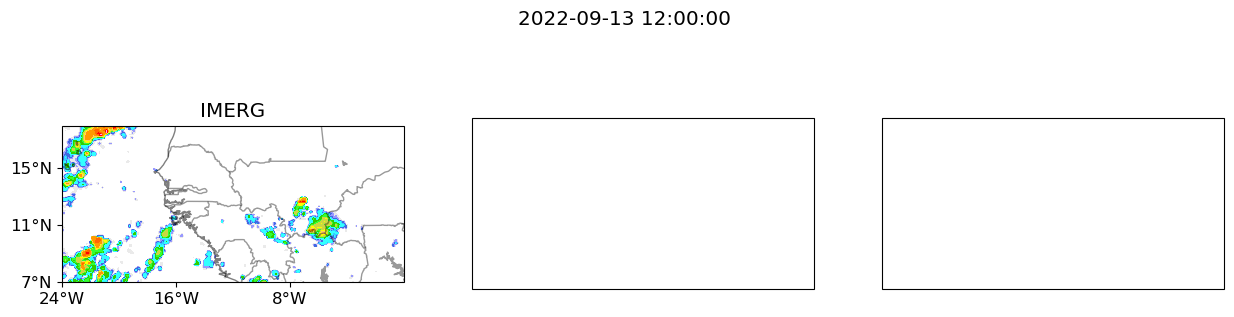

2022-09-13 18:00:00 2022-09-13 17:00:00 2022-09-13 19:00:00
2022-09-13 17:00:00
2022-09-13 19:00:00
/glade/work/mrislam/data/prComp/processed/IMERG.A01H.VLD20220913.S20220913T000000.E20220913T235959.FNL.V07B.SRCHHR.X3600Y1800.R0p1.FMT.nc


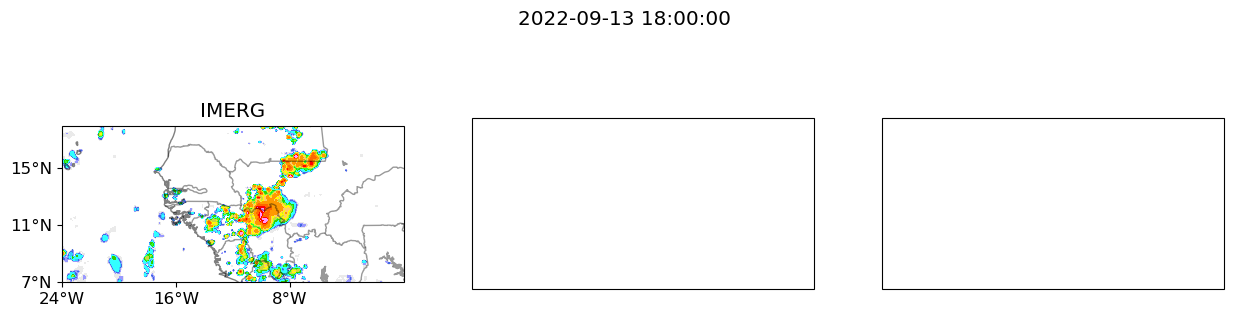

2022-09-14 00:00:00 2022-09-13 23:00:00 2022-09-14 01:00:00
2022-09-13 23:00:00
2022-09-14 01:00:00
/glade/work/mrislam/data/prComp/processed/IMERG.A01H.VLD20220914.S20220914T000000.E20220914T235959.FNL.V07B.SRCHHR.X3600Y1800.R0p1.FMT.nc


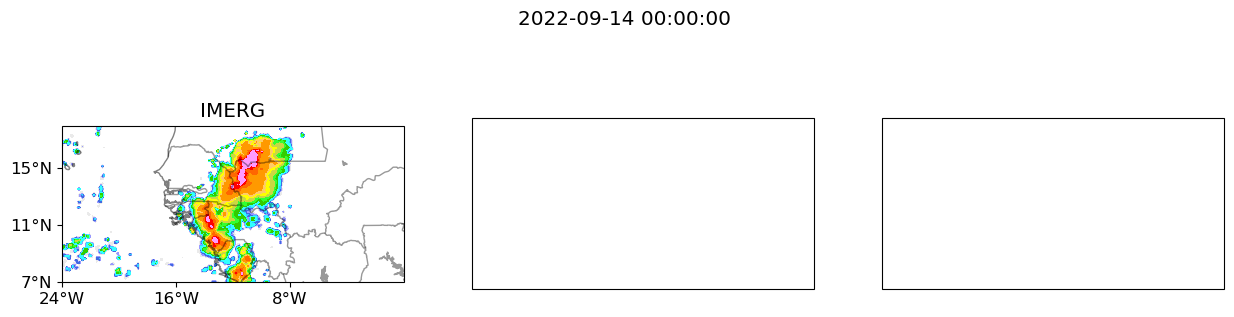

2022-09-14 06:00:00 2022-09-14 05:00:00 2022-09-14 07:00:00
2022-09-14 05:00:00
2022-09-14 07:00:00
/glade/work/mrislam/data/prComp/processed/IMERG.A01H.VLD20220914.S20220914T000000.E20220914T235959.FNL.V07B.SRCHHR.X3600Y1800.R0p1.FMT.nc


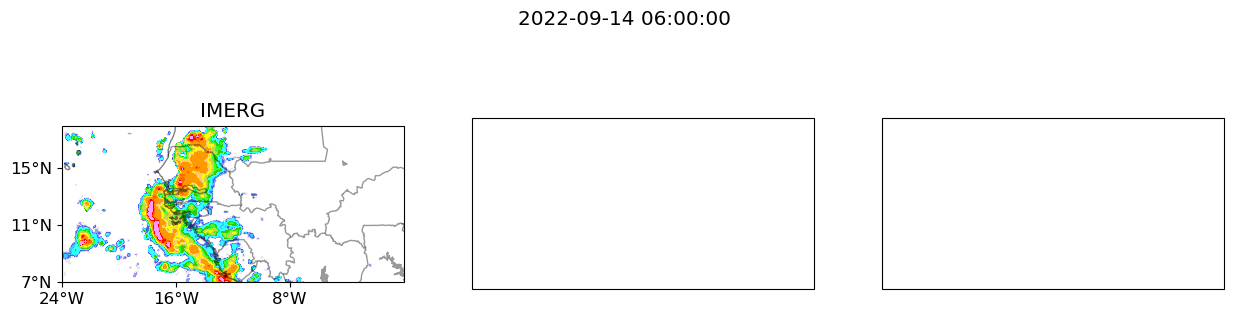

In [30]:
products = ['IMERG', 'CMORPH', 'PERSIANN']
# hours = np.arange(0,23,1)
# hours = [-1]
hours = ['2022-09-13_12','2022-09-13_18','2022-09-14_00','2022-09-14_06']
projection = ccrs.PlateCarree(central_longitude=centerLon)
for h in hours:
    central_time = datetime.datetime.strptime(h,'%Y-%m-%d_%H')
    start_time = central_time-datetime.timedelta(hours=1)
    end_time = central_time+datetime.timedelta(hours=1)
    print(central_time, start_time, end_time)

    # subset flight path to this time period
    dfSub = dfNav[(dfNav.time_datetime >= start_time) & (dfNav.time_datetime <= end_time)]

    # central_time = datetime.datetime(2022,9,14,h)
    fig,axes = plt.subplots(ncols=3,figsize=(15,4), subplot_kw={'projection': projection, 'sharey': True})
    for i,ax in enumerate(axes.flat): 
        # fname = f"{pth}/{fileNames[products[i]]}"
        fname = get_filename(products[i],central_time)
        fname = pth+fname
        print(fname)
        ds = xr.open_dataset(fname).sel(lat=slice(minLat,maxLat),lon=slice(minLon,maxLon))
        field1 = ds.precip.sel(time=central_time,method='nearest')
        if (products[i]=='MSWEP'):
            field1 = field1/3.0 #3 hourly
        lons, lats = np.meshgrid(field1.lon, field1.lat)
        ax.set_extent([minLon, maxLon, minLat, maxLat], crs=projection)
        
        # Add Latitudes
        ax.set_yticks(np.arange(minLat, maxLat, lat_interval), crs=projection)
        if (i == 0):
            lat_formatter = LatitudeFormatter()
            ax.yaxis.set_major_formatter(lat_formatter)
        else:
            labels = [item.get_text() for item in ax.get_yticklabels()]
            empty_string_labels = ['']*len(labels)
            ax.set_yticklabels(empty_string_labels)  
        
        # Add Longitudes
        ax.set_xticks(np.arange(minLon, maxLon, lon_interval), crs=projection)
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        ax.xaxis.set_major_formatter(lon_formatter)
        
        
        #add land boundaries
        landColor='k'
        ax.add_feature(cfeature.COASTLINE.with_scale('10m'),alpha=0.5,edgecolor=landColor)
        ax.add_feature(cfeature.BORDERS, alpha=0.4,edgecolor=landColor)
        ax.add_feature(cfeature.LAKES, alpha=0.4,edgecolor=landColor,facecolor='none')
        
        
        # Plot Data
        cnLevels = plottingInfo[mainVar]['levels']
        cmap = plottingInfo[mainVar]['cmap']
        # we need to normalize the colormap
        norm = mcolors.BoundaryNorm(boundaries=cnLevels, ncolors=len(cnLevels)-1)
        plotCnt = ax.contourf(lons, lats, field1,transform=projection,levels=cnLevels,extend='both',cmap=cmap,norm=norm)
        #add colormap
        # cb = plt.colorbar(plotCnt,ax=ax,shrink=0.75)
        # cb.ax.set_title('[%s]'%plottingInfo[mainVar]['units'],fontsize=10, loc='left')
        ax.set_title(products[i])

        if not dfSub.empty:
            # plot the entire flack track
            ax.plot(dfNav.Longitude, dfNav.Latitude, color="gray", linewidth=1)
            
            # plot only the time leg valid at this time
            # print(dfSub)
            ax.plot(dfSub.Longitude,dfSub.Latitude,color='white',transform=ccrs.PlateCarree(),linewidth=3)
            ax.plot(dfSub.Longitude,dfSub.Latitude,color='black',transform=ccrs.PlateCarree())
        
        # # add locations of dropsondes at this time
        # for fname in drop_file_list:
        #     # define label for this dropsonde
        #     label = fname[64:66] + ":" + fname[66:68]
        
        #     # read dropsonde data as a data frame
        #     df = pd.read_csv(fname, skiprows=123)
        
        #     # eliminate points where there's no temp and no dew point
        #     df = df[
        #         (df.Temperature != -9999.0)
        #         & (df.Dewpoint != -9999.0)
        #         & (df.Pressure >= 100.0)
        #         & (df.Latitude != -9999.0)
        #     ]
        
        #     ax.plot(df.Longitude.iloc[0], df.Latitude.iloc[0], "o", color="white", markersize=10)
        #     ax.plot(df.Longitude.iloc[0], df.Latitude.iloc[0], "o", color="black", markersize=8)
        break
    plt.suptitle(central_time)
    fOut = './Figures/multi-rain-products_%s.jpeg'%(central_time.strftime('%Y%m%d%H'))
    plt.savefig(fOut,dpi=150,bbox_inches='tight')
    display(fig)
    plt.close()

### Plot multiple time stamp as panels of a single plot

2022-09-13 12:00:00 2022-09-13 11:00:00 2022-09-13 12:00:00
2022-09-13 18:00:00 2022-09-13 17:00:00 2022-09-13 18:00:00
2022-09-14 00:00:00 2022-09-13 23:00:00 2022-09-14 00:00:00
2022-09-14 06:00:00 2022-09-14 05:00:00 2022-09-14 06:00:00


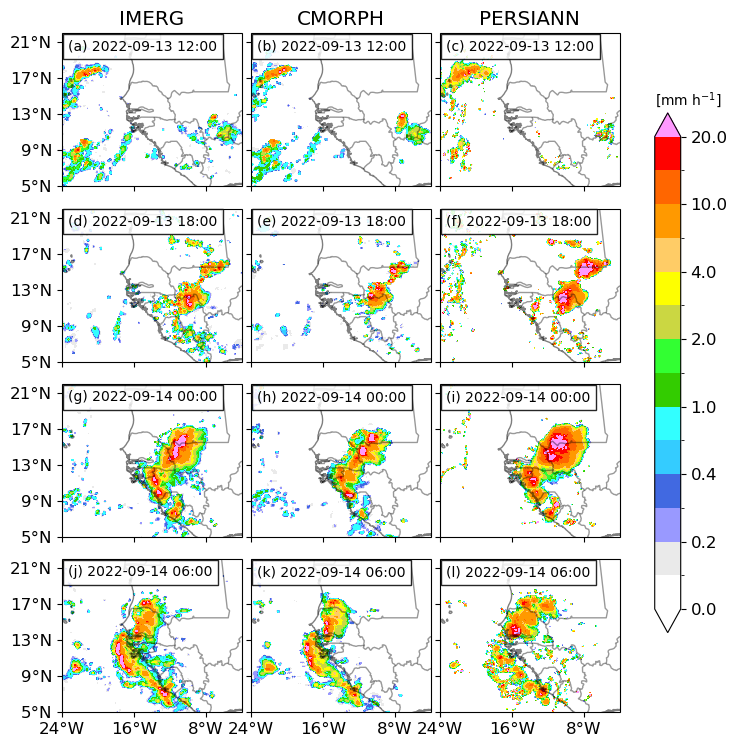

In [53]:
option = 'early'

if (option == 'early'):
    ## options for the early hours
    minLat = 5
    maxLat = 22
    minLon = -24
    maxLon = -4
    lat_interval = 4.0
    lon_interval = 8.0
    hours = ['2022-09-13_12','2022-09-13_18','2022-09-14_00','2022-09-14_06']
elif (option == 'flight'):
    ### options for the flight
    minLat = 6
    maxLat = 20
    minLon = -25
    maxLon = -10
    lat_interval = 4.0
    lon_interval = 5.0
    hours = ['2022-09-14_11','2022-09-14_12','2022-09-14_13','2022-09-14_16']
    northernArrowCoords = {
        '2022-09-14_11': [-17.0, 14.0],
        '2022-09-14_12': [-17.5, 14.0],
        '2022-09-14_13': [-17.5, 14.0],
        '2022-09-14_16': [-19.0, 14.0],
    }

    southernArrowCoords = {
        '2022-09-14_11': [-18.0, 10.0],
        '2022-09-14_12': [-18.5, 10.0],
        '2022-09-14_13': [-18.5, 10.0],
        '2022-09-14_16': [-20.0, 10.0],
    }
    # hours = [11, 12, 13, 16]

products = ['IMERG', 'CMORPH', 'PERSIANN']
projection = ccrs.PlateCarree(central_longitude=centerLon)
fig, ax = plt.subplots(nrows=len(hours),ncols=len(products),figsize=(9,9),
                       subplot_kw={'projection': projection})
# Manually reduce whitespace between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
# Define map projection
projection = ccrs.PlateCarree(central_longitude=centerLon)

l  = 0
projection = ccrs.PlateCarree(central_longitude=centerLon)
for i in range(len(hours)):
    h = hours[i]
    central_time = datetime.datetime.strptime(h,'%Y-%m-%d_%H')
    start_time = central_time-datetime.timedelta(hours=1)
    end_time = central_time+datetime.timedelta(hours=0)
    print(central_time, start_time, end_time)

    # subset flight path to this time period
    dfSub = dfNav[(dfNav.time_datetime >= start_time) & (dfNav.time_datetime <= end_time)]

    for j in range(len(products)):

        fname = get_filename(products[j],central_time)
        fname = pth+fname
        ds = xr.open_dataset(fname).sel(lat=slice(minLat,maxLat),lon=slice(minLon,maxLon))
        field1 = ds.precip.sel(time=central_time,method='nearest')
        if (products[j]=='MSWEP'):
            field1 = field1/3.0 #3 hourly
        lons, lats = np.meshgrid(field1.lon, field1.lat)
        ax[i,j].set_extent([minLon, maxLon, minLat, maxLat], crs=projection)
        
        # Add Latitudes
        ax[i,j].set_yticks(np.arange(minLat, maxLat, lat_interval), crs=projection)
        if (j == 0):
            lat_formatter = LatitudeFormatter()
            ax[i,j].yaxis.set_major_formatter(lat_formatter)
        else:
            labels = [item.get_text() for item in ax[i,j].get_yticklabels()]
            empty_string_labels = ['']*len(labels)
            ax[i,j].set_yticklabels(empty_string_labels)  
        
        # Add Longitudes
        ax[i,j].set_xticks(np.arange(minLon, maxLon, lon_interval), crs=projection)
        if (i == len(hours)-1):
            lon_formatter = LongitudeFormatter(zero_direction_label=True)
            ax[i,j].xaxis.set_major_formatter(lon_formatter)
        else:
            labels = [item.get_text() for item in ax[i,j].get_xticklabels()]
            empty_string_labels = ['']*len(labels)
            ax[i,j].set_xticklabels(empty_string_labels)  
        
        
        #add land boundaries
        landColor='k'
        ax[i,j].add_feature(cfeature.COASTLINE.with_scale('10m'),alpha=0.5,edgecolor=landColor)
        ax[i,j].add_feature(cfeature.BORDERS, alpha=0.4,edgecolor=landColor)
        ax[i,j].add_feature(cfeature.LAKES, alpha=0.4,edgecolor=landColor,facecolor='none')
        
        
        # Plot Data
        cnLevels = plottingInfo[mainVar]['levels']
        cmap = plottingInfo[mainVar]['cmap']
        # we need to normalize the colormap
        norm = mcolors.BoundaryNorm(boundaries=cnLevels, ncolors=len(cnLevels)-1)
        plotCnt = ax[i,j].contourf(lons, lats, field1,transform=projection,levels=cnLevels,extend='both',cmap=cmap,norm=norm)

        if not dfSub.empty:
            # plot the entire flack track
            ax[i,j].plot(dfNav.Longitude, dfNav.Latitude, color="gray", linewidth=2, alpha=0.7)
            
            # plot only the time leg valid at this time
            # print(dfSub)
            ax[i,j].plot(dfSub.Longitude,dfSub.Latitude,color='black',transform=ccrs.PlateCarree(),linewidth=3)

        if option == 'flight':
            # --- Northern Arrow (Purple) ---
            # Index 0 is Longitude
            # Index 1 is Latitude 
            arrow_lon = northernArrowCoords[h][0]
            arrow_lat = northernArrowCoords[h][1]
            
            src_crs = ccrs.PlateCarree() 
            projected_xy = projection.transform_point(arrow_lon, arrow_lat, src_crs)
            
            ax[i,j].annotate('', 
                             xy=projected_xy,           
                             xycoords='data',
                             xytext=(20, 0),            
                             textcoords='offset points',
                             arrowprops=dict(facecolor='purple', edgecolor='purple', 
                                             arrowstyle='->', 
                                             lw=2,            
                                             shrinkA=0, shrinkB=0 
                                            ))
                                            
            # --- Southern Arrow (Black) ---
            s_arrow_lon = southernArrowCoords[h][0]
            s_arrow_lat = southernArrowCoords[h][1]
            
            s_projected_xy = projection.transform_point(s_arrow_lon, s_arrow_lat, src_crs)
            
            ax[i,j].annotate('', 
                             xy=s_projected_xy,           
                             xycoords='data',
                             xytext=(20, 0),            
                             textcoords='offset points',
                             arrowprops=dict(facecolor='black', edgecolor='black', 
                                             arrowstyle='->', 
                                             lw=2,            
                                             shrinkA=0, shrinkB=0 
                                            ))

        # add panel labels
        label = f"({chr(l+97)}) {central_time.strftime('%Y-%m-%d %H:%M')}"
        ax[i,j].text(0.035, 0.96, label,
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax[i,j].transAxes,
            fontsize='10', bbox=dict(facecolor='white', alpha=0.85))
        l += 1

        # add product name at the top
        if i == 0:
            ax[i,j].set_title(products[j])

        
        # # add locations of dropsondes at this time
        # for fname in drop_file_list:
        #     # define label for this dropsonde
        #     label = fname[64:66] + ":" + fname[66:68]
        
        #     # read dropsonde data as a data frame
        #     df = pd.read_csv(fname, skiprows=123)
        
        #     # eliminate points where there's no temp and no dew point
        #     df = df[
        #         (df.Temperature != -9999.0)
        #         & (df.Dewpoint != -9999.0)
        #         & (df.Pressure >= 100.0)
        #         & (df.Latitude != -9999.0)
        #     ]
        
        #     ax.plot(df.Longitude.iloc[0], df.Latitude.iloc[0], "o", color="white", markersize=10)
        #     ax.plot(df.Longitude.iloc[0], df.Latitude.iloc[0], "o", color="black", markersize=8)

### add colormap
cb = plt.colorbar(plotCnt,ax=ax,shrink=0.75)
cb.ax.set_title('[%s]'%plottingInfo[mainVar]['units'],fontsize=10,loc='left')
plt.savefig('./Figures/observed_precip_evolution_multi_products_%s.jpeg'%option,dpi=600,bbox_inches='tight')